# IMT2220 Cálculo para Ciencia de Datos – 2025-2
## Tarea 1
**Autor:** Ignacio Labarca  
**Fecha de entrega:** Martes 6 de Octubre de 2025 (por Canvas)

### Tarea
Esta tarea contempla la implementación del método de descenso de gradiente y el análisis de tres funciones.

Pasos a seguir:
1. Para cada función, calcule (a mano) el vector gradiente, los puntos críticos y caracterice con el criterio de la matriz Hessiana. Escriba el resultado.
2. Obtenga el gráfico de cada función (superficie 3D) usando `matplotlib`.
3. Obtenga (en otra figura) varias curvas de nivel para cada función (`plt.contour`).
4. Agregue todos los puntos críticos como marcadores en la figura anterior (min. locales en verde).
5. Implemente el método de descenso de gradiente.
6. Ejecute el algoritmo en los 6 casos solicitados (γ = 0.1, nmax = 100).
7. Grafique toda la secuencia de aproximaciones junto a curvas de nivel.

Paso 0: Librerías a utilizar

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

1 - Definimos las funciones f, g y h, luego las mostramos con display para confirmar que están bien.

In [2]:
sp.init_printing(use_unicode=True)
x, y = sp.symbols('x y', real=True)


f = x**4 - 2*x**2 + sp.Rational(1, 2)*y**2
g = x**2 - 2*y**2
h = x**2 + y**2 + x*y - 3*x - 3*y + 3

funcs = {"f": f, "g": g, "h": h}
for function, expression in funcs.items():
    print(f"\n {function}(x,y) =")
    display(sp.simplify(expression)) # Usamos display para ver bien las funciones


 f(x,y) =



 g(x,y) =



 h(x,y) =


Calculamos a mano el vector gradiente, los puntos críticos, y categorizamos con el criterio de la matriz Hessiana las tres funciones dadas en el enunciado de  la tarea. Lo he realizado a mano primero, luego compobaré los resultados con la librería sympy, así que la utilizaré para escribir los resultados del cálculo, y también para confirmar los resultados obtenidos.

#### F(x,y) = x^4 - 2x^2 + (1/2)y^2

Primero, calculamos las derivadas parciales con respecto a x e y:

Derivada f con respecto a x (f_x): 4x^3 - 4x = 4x(x^2-1)

Derivada f con respecto a y (f_y): y

Luego, armamos el gradiente:
Gradiente de f(x,y) = (4x^3 - 4x, y) (es un vector)

Luego, calculamos los puntos críticos igualando el gradiente a cero, eso nos da un sistema de ecuaciones que tenemos que resolver:

- $4x(x^2-1) = 0 \Rightarrow x = 1, x = -1, x = 0$

y = 0

Con eso, tenemos los puntos $(-1,0)$ $(1,0)$ y $(0,0)$

Usamos la matriz Hessiana y clasificamos con el criterio:

$f_{xx} = 12x^2 - 4$,
$f_{yy} = 1$, 
$f_{xy} = f_{yx} = 0$

$H_f = \begin{pmatrix}12x^2-4 & 0\\0 & 1\end{pmatrix}$

Evaluamos los puntos $(\pm1,0)$: $H_f = \begin{pmatrix}8&0\\0&1\end{pmatrix}$ definida positiva $\Rightarrow$ **mínimos locales**.

$(0,0)$: $H_f = \begin{pmatrix}-4&0\\0&1\end{pmatrix}$, determinante $<0$ $\Rightarrow$ **punto silla**.


#### Función g(x,y) = x^2 - 2y^2

Primero, calculamos las derivadas parciales con respecto a x e y:

Derivada g con respecto a x (g_x): 2x

Derivada g con respecto a y (g_y): -4y

Luego, armamos el gradiente:
Gradiente de $g(x,y)$ = $(2x, -4y)$

Buscamos los puntos críticos igualando el gradiente a cero, eso nos vuelve a dar un sistema muy simple:

- $2x = 0 \Rightarrow x = 0$

- $-4y = 0 \Rightarrow y = 0$

Con eso, el único punto crítico que aparece es $(0,0)$.

Usamos la matriz Hessiana y clasificamos con el criterio:

$g_{xx} = 2$,
$g_{yy} = -4$,
$g_{xy} = g_{yx} = 0$

$H_g = \begin{pmatrix}2&0\\0&-4\end{pmatrix}$

Evaluamos en $(0,0)$: $H_g = \begin{pmatrix}2&0\\0&-4\end{pmatrix}$ tiene determinante negativo $\Rightarrow$ **punto silla**.


#### h(x,y) = x^2 + y^2 + xy - 3x - 3y + 3

Primero, sacamos las derivadas parciales con respecto a las variables x e y:

Derivada h con respecto a x (h_x): $2x + y - 3$

Derivada h con respecto a y (h_y): $x + 2y - 3$

El gradiente queda:
Gradiente de $h(x,y)$ = $(2x + y - 3,\; x + 2y - 3)$

Para encontrar los puntos críticos igualamos el gradiente a cero y resolvemos:

2x + y - 3 = 0

x + 2y - 3 = 0

De la primera ecuación despejamos $y = 3 - 2x$ y la metemos en la segunda ecuaci[on para obtener:
$x + 2(3 - 2x) = 3 \Rightarrow 3 - 3x = 0 \Rightarrow x = 1$, y por lo mismo $y = 1$

Entonces el punto crítico es (1,1)

Ahora usamos la matriz Hessiana para clasificar:

h_xx = 2$,
h_yy = 2$,
h_xy = h_{yx} = 1$

$H_h = \begin{pmatrix}2&1\\1&2\end{pmatrix}$

Evaluamos en 1,1: $H_h = \begin{pmatrix}2&1\\1&2\end{pmatrix}$ tiene determinante positivo y h_xx > 0 $\Rightarrow$ mínimo global

Finalmente, obtenemos los resultados para llas 3 funciones del enunciado:

$f$: mínimos en $(\pm1,0)$ y tenemos punto silla en $(0,0)$

$g$: punto silla en $(0,0)$

$h$: mínimo global en $(1,1)$

In [3]:
x, y = sp.symbols('x y', real=True) # Boilerplate

# Para construir el gradiente, derivamos parcialmente la función f con respecto a sus
# variables x e y, luego el gradiente es el vector formado por estas derivadas parciales.
fx = sp.diff(f, x)
fy = sp.diff(f, y)
print('Vector gradiente de la función f = (fx, fy) =', (fx, fy))

'''

Ahora, sabemos que los puntos críticos se obtienen igualando el vector gradiente a cero, o 
mirando dónde el gradiente no está definido. Pero para estas tres funciones, el gradiente siempre
está definido, ya que son funciones polinómicas.
'''
# Igualamos el vector gradiente a cero con la librería sympy
critic_points = sp.solve((sp.Eq(fx, 0), sp.Eq(fy, 0)), (x, y), dict=True)
print('Puntos críticos de la función f:', critic_points)

'''
Definimos la matriz hezziana, y luego la evaluamos en cada punto crítico para clasificarlo.
Hacemos uso de la librería sympy, pero el cálculo a mano fue muy sencillo porque sólo hay que calcular 
la segunda derivada parcial de f con respecto a las variables x e y, en el siguiente orden:
    Hf = f_xx, f_xy, y en la segunda fila: f_yx  f_yy
            
'''
Hf = sp.hessian(f, (x, y))
print('Hessiana Hf =', Hf)

# Boilerplate para mostrar las matrices correctamente:
try:
    from IPython.display import display, Math
    display(Math(sp.latex(Hf)))
except Exception:
    pass


'''
Ahora, para cada punto crítico, haremos un loop, y en cada iteración vamos a evaluar
el gradiente, la matriz Hessiana, y su determinante en el punto crítico, luego
usaremos el criterio de la matriz Hessiana para clasificar si el punto es un máximo local,
mínimo local, punto silla, o si es indeterminado (esto ocurre cuando el determinante de la 
matriz Hessiana es cero).
'''

clasifs_f = []
vals_f = []
for point in critic_points:
    # Evaluaciones en el punto crítico
    grad_at = (fx.subs(point), fy.subs(point))

    H_at = Hf.subs(point) # Evaluamos el punto crítico en la matriz Hessiana
    det_sym = H_at.det() # Calculamos simbólicamente el determinante de la matriz anterior evaluada.
    det_value = float(sp.N(det_sym)) # Usamos sp.N para obtener el valor numérico, y pasamos a float


    print(f"Solución del sistema (punto crítico): {point}")
    print(f"Gradiente evaluado en el punto: {grad_at}")
    print(f"Matriz Hessiana: {Hf}")
    print(f"Matriz Hessiana evaluada en el punto: {H_at}")
    print(f"Determinante de la matriz Hessiana en el punto: {det_sym}")

    # Criterio de la matriz Hessiana para evaluar:
    if det_value > 0:
        fxx_at = Hf[0, 0].subs(point)  # Claculamos la segunda derivada parcial respecto a x
        # Si f_xx > 0, entonces es mínimo local, si f_xx < 0, entonces es máximo local
        print("Derivada parcial f_xx en el punto:", fxx_at)
        if float(sp.N(fxx_at)) > 0:
            classification = "mínimo local"
        else:
            classification = "máximo local"
    elif det_value < 0:
        classification = "punto silla"
    else:
        classification = "indeterminado"

    print(f"Clasificación del punto crítico {point}:", classification)
    print("-" * 80)

    # Guardamos el punto y su clasificación
    clasifs_f.append((point, classification))
    vals_f.append((point, float(sp.N(f.subs(point))))) # Valor de la función en el punto crítico

print("Clasificación por Hessiana para f:")
for punto, tipo in clasifs_f:
    valor_f = float(sp.N(f.subs(punto)))
    print(f"  {punto} -> {tipo}, f = {valor_f}")

# Buscamos los mínimos de la función entre los puntos críticos encontrados
valores = [v for _, v in vals_f]
min_val = min(valores)

tol = 1e-12 # Tolerancia para comrparar los floats, sin tener problemas de precisión
min_pts = [p for p, v in vals_f if abs(v - min_val) < tol]

print(f"El valor mínimo encontrado es: {min_val} y está en {min_pts}")

Vector gradiente de la función f = (fx, fy) = (4*x**3 - 4*x, y)
Puntos críticos de la función f: [{x: -1, y: 0}, {x: 0, y: 0}, {x: 1, y: 0}]
Hessiana Hf = Matrix([[12*x**2 - 4, 0], [0, 1]])


<IPython.core.display.Math object>

Solución del sistema (punto crítico): {x: -1, y: 0}
Gradiente evaluado en el punto: (0, 0)
Matriz Hessiana: Matrix([[12*x**2 - 4, 0], [0, 1]])
Matriz Hessiana evaluada en el punto: Matrix([[8, 0], [0, 1]])
Determinante de la matriz Hessiana en el punto: 8
Derivada parcial f_xx en el punto: 8
Clasificación del punto crítico {x: -1, y: 0}: mínimo local
--------------------------------------------------------------------------------
Solución del sistema (punto crítico): {x: 0, y: 0}
Gradiente evaluado en el punto: (0, 0)
Matriz Hessiana: Matrix([[12*x**2 - 4, 0], [0, 1]])
Matriz Hessiana evaluada en el punto: Matrix([[-4, 0], [0, 1]])
Determinante de la matriz Hessiana en el punto: -4
Clasificación del punto crítico {x: 0, y: 0}: punto silla
--------------------------------------------------------------------------------
Solución del sistema (punto crítico): {x: 1, y: 0}
Gradiente evaluado en el punto: (0, 0)
Matriz Hessiana: Matrix([[12*x**2 - 4, 0], [0, 1]])
Matriz Hessiana evaluada en 

In [4]:
x, y = sp.symbols('x y', real=True)
g = x**2 - 2*y**2

# Gradiente
gx = sp.diff(g, x)
gy = sp.diff(g, y)
print('Vector gradiente de la función g = (gx, gy) =', (gx, gy))

'''
Los puntos críticos se obtienen resolviendo ∇g = 0.
'''
critic_points_g = sp.solve((sp.Eq(gx, 0), sp.Eq(gy, 0)), (x, y), dict=True)
print('Puntos críticos de la función g:', critic_points_g)

'''
Matriz Hessiana y clasificación por el criterio de la Hessiana.
'''
Hg = sp.hessian(g, (x, y))
print('Hessiana Hg =', Hg)
try:
    from IPython.display import display, Math
    display(Math(sp.latex(Hg)))
except Exception:
    pass

clasifs_g = []
vals_g = []
for point in critic_points_g:
    # Evaluaciones en el punto crítico
    grad_at = (gx.subs(point), gy.subs(point))
    H_at = Hg.subs(point)
    det_sym = H_at.det()
    det_value = float(sp.N(det_sym))

    print(f"Solución del sistema (punto crítico): {point}")
    print(f"Gradiente evaluado en el punto: {grad_at}")
    print(f"Matriz Hessiana: {Hg}")
    print(f"Matriz Hessiana evaluada en el punto: {H_at}")
    print(f"Determinante de la matriz Hessiana en el punto: {det_sym}")

    # Criterio de la Hessiana
    if det_value > 0:
        gxx_at = Hg[0, 0].subs(point)
        print("Derivada parcial g_xx en el punto:", gxx_at)
        if float(sp.N(gxx_at)) > 0:
            classification = "mínimo local"
        else:
            classification = "máximo local"
    elif det_value < 0:
        classification = "punto silla"
    else:
        classification = "indeterminado"

    print(f"Clasificación del punto crítico {point}:", classification)
    print("-" * 80)

    clasifs_g.append((point, classification))
    vals_g.append((point, float(sp.N(g.subs(point)))))

print("Clasificación por Hessiana para g:")
for punto, tipo in clasifs_g:
    valor_g = float(sp.N(g.subs(punto)))
    print(f"  {punto} -> {tipo}, g = {valor_g}")

# Buscamos los mínimos de g entre los puntos críticos encontrados
valores = [v for _, v in vals_g]
min_val = min(valores) if valores else None

tol = 1e-12  # Tolerancia para comparar floats sin problemas de precisión
min_pts = [p for p, v in vals_g if min_val is not None and abs(v - min_val) < tol]

print(f"El valor mínimo (entre críticos) encontrado es: {min_val} y está en {min_pts}")

Vector gradiente de la función g = (gx, gy) = (2*x, -4*y)
Puntos críticos de la función g: [{x: 0, y: 0}]
Hessiana Hg = Matrix([[2, 0], [0, -4]])


<IPython.core.display.Math object>

Solución del sistema (punto crítico): {x: 0, y: 0}
Gradiente evaluado en el punto: (0, 0)
Matriz Hessiana: Matrix([[2, 0], [0, -4]])
Matriz Hessiana evaluada en el punto: Matrix([[2, 0], [0, -4]])
Determinante de la matriz Hessiana en el punto: -8
Clasificación del punto crítico {x: 0, y: 0}: punto silla
--------------------------------------------------------------------------------
Clasificación por Hessiana para g:
  {x: 0, y: 0} -> punto silla, g = 0.0
El valor mínimo (entre críticos) encontrado es: 0.0 y está en [{x: 0, y: 0}]


In [5]:
x, y = sp.symbols('x y', real=True)
h = x**2 + y**2 + x*y - 3*x - 3*y + 3

# Gradiente
hx = sp.diff(h, x)
hy = sp.diff(h, y)
print('Vector gradiente de la función h = (hx, hy) =', (hx, hy))

'''
Los puntos críticos se obtienen resolviendo ∇h = 0.
'''
critic_points_h = sp.solve((sp.Eq(hx, 0), sp.Eq(hy, 0)), (x, y), dict=True)
print('Puntos críticos de la función h:', critic_points_h)

'''
Matriz Hessiana y clasificación por el criterio de la Hessiana.
'''
Hh = sp.hessian(h, (x, y))
print('Hessiana Hh =', Hh)
try:
    from IPython.display import display, Math
    display(Math(sp.latex(Hh)))
except Exception:
    pass

clasifs_h = []
vals_h = []
for point in critic_points_h:
    # Evaluaciones en el punto crítico
    grad_at = (hx.subs(point), hy.subs(point))
    H_at = Hh.subs(point)
    det_sym = H_at.det()
    det_value = float(sp.N(det_sym))

    print(f"Solución del sistema (punto crítico): {point}")
    print(f"Gradiente evaluado en el punto: {grad_at}")
    print(f"Matriz Hessiana: {Hh}")
    print(f"Matriz Hessiana evaluada en el punto: {H_at}")
    print(f"Determinante de la matriz Hessiana en el punto: {det_sym}")

    # Criterio de la Hessiana
    if det_value > 0:
        hxx_at = Hh[0, 0].subs(point)
        print("Derivada parcial h_xx en el punto:", hxx_at)
        if float(sp.N(hxx_at)) > 0:
            classification = "mínimo local"
        else:
            classification = "máximo local"
    elif det_value < 0:
        classification = "punto silla"
    else:
        classification = "indeterminado"

    print(f"Clasificación del punto crítico {point}:", classification)
    print("-" * 80)

    clasifs_h.append((point, classification))
    vals_h.append((point, float(sp.N(h.subs(point)))))

print("Clasificación por Hessiana para h:")
for punto, tipo in clasifs_h:
    valor_h = float(sp.N(h.subs(punto)))
    print(f"  {punto} -> {tipo}, h = {valor_h}")

# Buscamos los mínimos de h entre los puntos críticos encontrados
valores = [v for _, v in vals_h]
min_val = min(valores) if valores else None

tol = 1e-12  # Tolerancia para comparar floats sin problemas de precisión
min_pts = [p for p, v in vals_h if min_val is not None and abs(v - min_val) < tol]

print(f"El valor mínimo (entre críticos) encontrado es: {min_val} y está en {min_pts}")

# Comentario: para h la Hessiana es definida positiva (autovalores > 0),
# por lo que el punto crítico es único y corresponde al mínimo global.

Vector gradiente de la función h = (hx, hy) = (2*x + y - 3, x + 2*y - 3)
Puntos críticos de la función h: [{x: 1, y: 1}]
Hessiana Hh = Matrix([[2, 1], [1, 2]])


<IPython.core.display.Math object>

Solución del sistema (punto crítico): {x: 1, y: 1}
Gradiente evaluado en el punto: (0, 0)
Matriz Hessiana: Matrix([[2, 1], [1, 2]])
Matriz Hessiana evaluada en el punto: Matrix([[2, 1], [1, 2]])
Determinante de la matriz Hessiana en el punto: 3
Derivada parcial h_xx en el punto: 2
Clasificación del punto crítico {x: 1, y: 1}: mínimo local
--------------------------------------------------------------------------------
Clasificación por Hessiana para h:
  {x: 1, y: 1} -> mínimo local, h = 0.0
El valor mínimo (entre críticos) encontrado es: 0.0 y está en [{x: 1, y: 1}]


Paso 1 (verificación con SymPy): Definición de f, g, h

In [6]:
def grad(expr):
    return sp.Matrix([sp.diff(expr, x), sp.diff(expr, y)])

def hess(expr):
    return sp.hessian(expr, (x, y))

grads = {name: grad(expr) for name, expr in funcs.items()}
hesss = {name: hess(expr) for name, expr in funcs.items()}

for name in funcs:
    print(f"Gradiente de la función {name} =")
    display(grads[name])
    print(f"Hessiana de la función {name} =")
    display(hesss[name])

Gradiente de la función f =


⎡   3      ⎤
⎢4⋅x  - 4⋅x⎥
⎢          ⎥
⎣    y     ⎦

Hessiana de la función f =


⎡    2       ⎤
⎢12⋅x  - 4  0⎥
⎢            ⎥
⎣    0      1⎦

Gradiente de la función g =


⎡2⋅x ⎤
⎢    ⎥
⎣-4⋅y⎦

Hessiana de la función g =


⎡2  0 ⎤
⎢     ⎥
⎣0  -4⎦

Gradiente de la función h =


⎡2⋅x + y - 3⎤
⎢           ⎥
⎣x + 2⋅y - 3⎦

Hessiana de la función h =


⎡2  1⎤
⎢    ⎥
⎣1  2⎦

Verificamos nuevamente con sympy los gradientes y las matrices hessianas:

In [7]:
# Usamos sp.solve para resolver el sistema de ecuaciones igualando el gradiente a cero
criticos = {name: sp.solve(list(grads[name]), (x, y), dict=True) for name in funcs}

def clasificar_hess(H):
    det_val = float(sp.simplify(H.det()))
    a11_val = float(sp.simplify(H[0, 0]))
    if det_val > 0 and a11_val > 0:
        return "mínimo local"
    if det_val > 0 and a11_val < 0:
        return "máximo local"
    if det_val < 0:
        return "punto silla"
    return "indeterminado"

for name, expr in funcs.items():
    print(f"Función {name}:")
    for sol in criticos[name]:
        H_at = hesss[name].subs(sol)
        clasif = clasificar_hess(H_at)
        val = sp.simplify(expr.subs(sol))
        print(f"Punto crítico: {sol}  -> {clasif},  valor = {val}")
    if not criticos[name]:
        print("Sin soluciones críticas.")

Función f:
Punto crítico: {x: -1, y: 0}  -> mínimo local,  valor = -1
Punto crítico: {x: 0, y: 0}  -> punto silla,  valor = 0
Punto crítico: {x: 1, y: 0}  -> mínimo local,  valor = -1
Función g:
Punto crítico: {x: 0, y: 0}  -> punto silla,  valor = 0
Función h:
Punto crítico: {x: 1, y: 1}  -> mínimo local,  valor = 0


2. Obtenga el gráfico de cada función (superficie 3D) usando `matplotlib`:

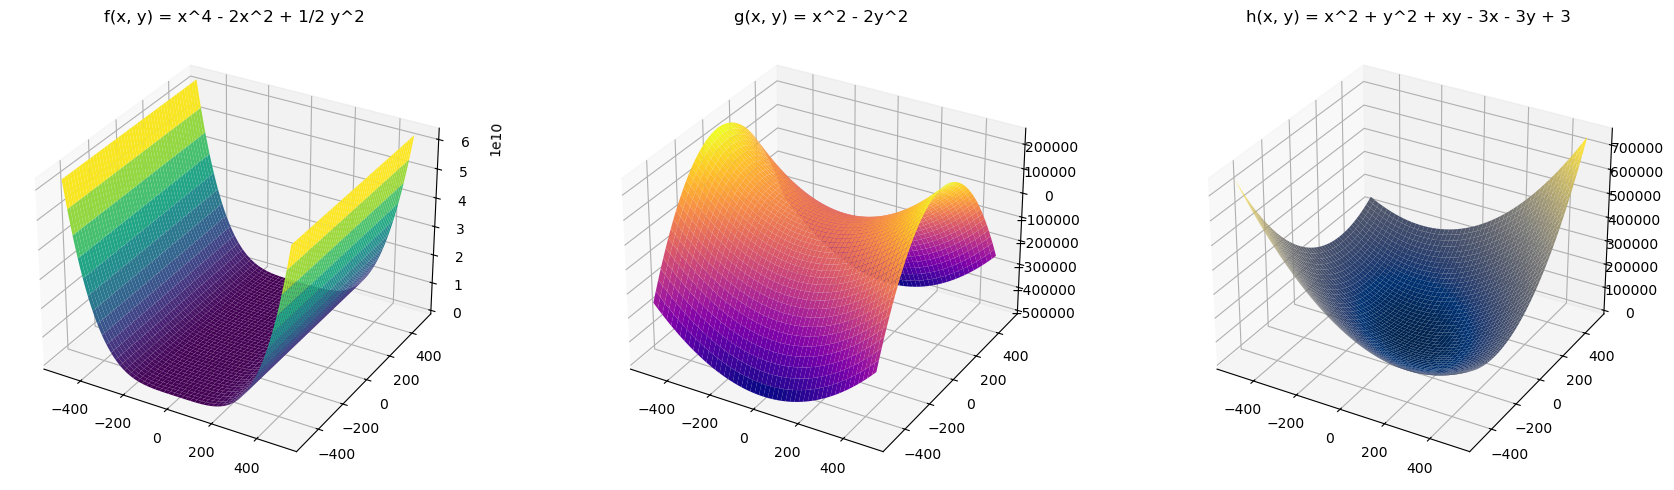

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Malla común
x_vals = np.linspace(-500, 500, 500)
y_vals = np.linspace(-500, 500, 500)
X, Y = np.meshgrid(x_vals, y_vals)

#Nuevamente, definimos las funciones f, g, h en términos de arrays NumPy, para ello
# creamos las funciones f_np, g_np, h_np y las llamamos en cada variable de la malla
def f_np(X, Y):
    return X**4 - 2*X**2 + 0.5*Y**2

# g(x, y) = x^2 - 2y^2
def g_np(X, Y):
    return X**2 - 2*Y**2

# h(x, y) = x^2 + y^2 + x*y - 3x - 3y + 3
def h_np(X, Y):
    return X**2 + Y**2 + X*Y - 3*X - 3*Y + 3

Zf = f_np(X, Y)
Zg = g_np(X, Y)
Zh = h_np(X, Y)

# Graficamos las tres funciones en subplots tridimensionales
fig = plt.figure(figsize=(18, 5))
ax1 = fig.add_subplot(131, projection='3d')
ax1.plot_surface(X, Y, Zf, cmap='viridis')
ax1.set_title("f(x, y) = x^4 - 2x^2 + 1/2 y^2")

ax2 = fig.add_subplot(132, projection='3d')
ax2.plot_surface(X, Y, Zg, cmap='plasma')
ax2.set_title("g(x, y) = x^2 - 2y^2")

ax3 = fig.add_subplot(133, projection='3d')
ax3.plot_surface(X, Y, Zh, cmap='cividis')
ax3.set_title("h(x, y) = x^2 + y^2 + xy - 3x - 3y + 3")

plt.tight_layout()
plt.show()

3. Obtenga (en otra figura) varias curvas de nivel para cada función (`plt.contour`).
4. Agregue todos los puntos críticos como marcadores en la figura anterior (min. locales en verde).

Hacemos el paso 3 y 4 juntos en una misma celda, ya que se pide graficar las curvas de nivel, y luego agregar todos los puntos críticos como marcadores en la figura anterior, hacerlo en dos partes sería repetir lo mismo, lo haremos todo de una vez, los puntos críticos que son mínimos serán representados en color verder, mientras que los punttos silla serán representados en rojo:

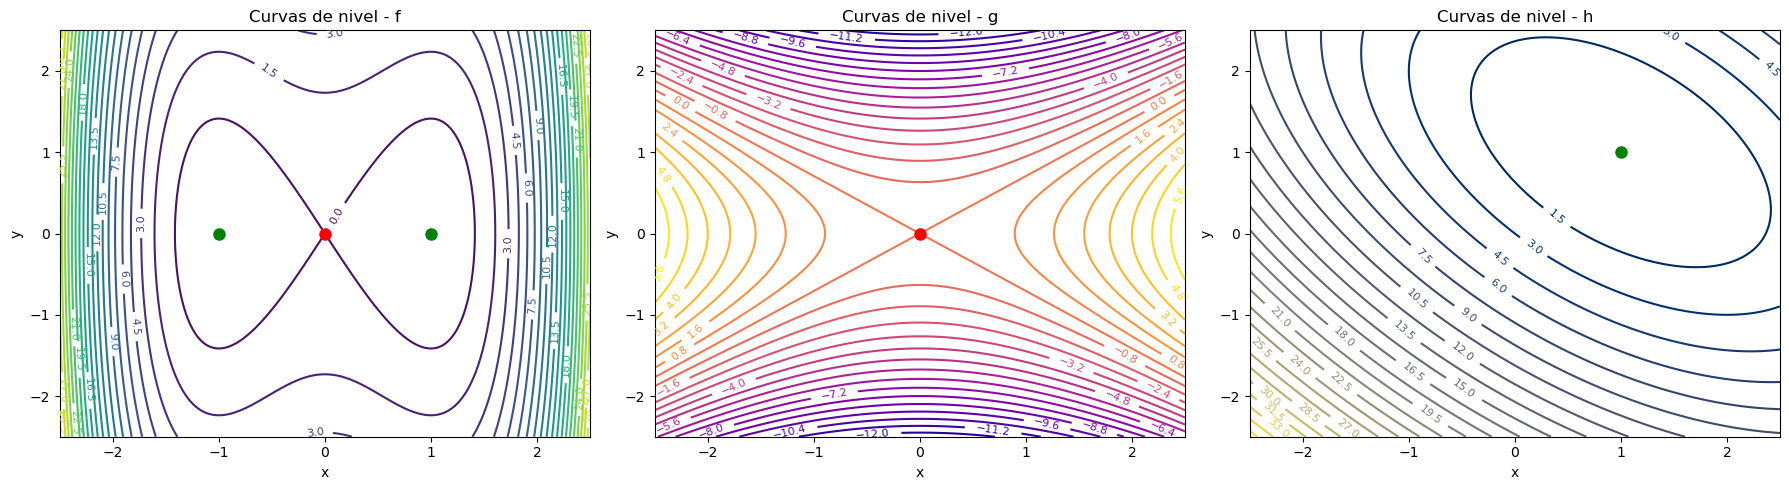

In [9]:
# Preparamos las funciones NumPy usando lambdify
f_np_sym = sp.lambdify((x, y), f, "numpy")
g_np_sym = sp.lambdify((x, y), g, "numpy")
h_np_sym = sp.lambdify((x, y), h, "numpy")

# Reutilizamos la malla usada antes
xs = np.linspace(-2.5, 2.5, 300)
ys = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(xs, ys)
Zf = f_np_sym(X, Y)
Zg = g_np_sym(X, Y)
Zh = h_np_sym(X, Y)

# Obtenemos los puntos críticos y su clasificación (ya calculados)
criticos = {name: sp.solve(list(grads[name]), (x, y), dict=True) for name in funcs}

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# función f
cs = axs[0].contour(X, Y, Zf, levels=25, cmap='viridis')
axs[0].clabel(cs, inline=True, fontsize=8)
axs[0].set_title('Curvas de nivel - f')
for sol in criticos['f']:
    H_at = hesss['f'].subs(sol)
    det_val = float(H_at.det())
    a11_val = float(H_at[0,0])
    color = 'k'
    if det_val > 0 and a11_val > 0:
        color = 'g'  # mínimo
    elif det_val < 0:
        color = 'r'  # silla
    axs[0].plot([float(sol[x])], [float(sol[y])], marker='o', color=color, markersize=8)

# función g
cs = axs[1].contour(X, Y, Zg, levels=25, cmap='plasma')
axs[1].clabel(cs, inline=True, fontsize=8)
axs[1].set_title('Curvas de nivel - g')
for sol in criticos['g']:
    H_at = hesss['g'].subs(sol)
    det_val = float(H_at.det())
    a11_val = float(H_at[0,0])
    color = 'k'
    if det_val > 0 and a11_val > 0:
        color = 'g'
    elif det_val < 0:
        color = 'r'
    axs[1].plot([float(sol[x])], [float(sol[y])], marker='o', color=color, markersize=8)

# función h
cs = axs[2].contour(X, Y, Zh, levels=25, cmap='cividis')
axs[2].clabel(cs, inline=True, fontsize=8)
axs[2].set_title('Curvas de nivel - h')
for sol in criticos['h']:
    H_at = hesss['h'].subs(sol)
    det_val = float(H_at.det())
    a11_val = float(H_at[0,0])
    color = 'k'
    if det_val > 0 and a11_val > 0:
        color = 'g'
    elif det_val < 0:
        color = 'r'
    axs[2].plot([float(sol[x])], [float(sol[y])], marker='o', color=color, markersize=8)

for ax in axs:
    ax.set_xlabel('x'); ax.set_ylabel('y')

plt.tight_layout()
plt.show()

5. Implemente el método de descenso de gradiente.

In [10]:
def descenso_grad(grad_expr, x0, gamma=0.1, nmax=100, tol=1e-10):
    grad_np = sp.lambdify((x, y), grad_expr, "numpy")
    p = np.array(x0, dtype=float)
    path = [p.copy()]
    for k in range(nmax):
        gval = np.array(grad_np(p[0], p[1]), dtype=float).reshape(-1)
        if np.linalg.norm(gval) < tol:
            break
        p = p - gamma * gval
        path.append(p.copy())
    return np.array(path)

# Función para graficar curvas de nivel y el camino (path) seguido por el descenso de gradiente
def plot_contour_with_path(expr_np, path, title, levels=30, xlim=(-2.5, 2.5), ylim=(-2.5, 2.5)):
    xs = np.linspace(xlim[0], xlim[1], 300)
    ys = np.linspace(ylim[0], ylim[1], 300)
    X, Y = np.meshgrid(xs, ys)
    Z = expr_np(X, Y)
    plt.figure(figsize=(5,4))
    cs = plt.contour(X, Y, Z, levels=levels, cmap='viridis')
    plt.colorbar(cs)
    # Trayectoria en rojo
    plt.plot(path[:,0], path[:,1], 'r.-', label='GD path')
    # Marcar inicio (verde círculo) y fin (negro X)
    plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, label='inicio', zorder=5)
    plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, label='fin', zorder=6)
    plt.xlabel('x'); plt.ylabel('y'); plt.title(title)
    plt.legend(); plt.show()

Paso 6: Ejecuciones del algoritmo para los 6 casos (γ = 0.1, nmax = 100)

In [11]:
x, y = sp.symbols('x y') # Variables simbólicas

# Definimos nuevamente las funciones
f_sym = x**4 - 2*x**2 + (1/2)*y**2
g_sym = x**2 - 2*y**2
h_sym = x**2 + y**2 + x*y - 3*x - 3*y + 3

# Gradientes
grad_f_sym = sp.Matrix([sp.diff(f_sym, var) for var in (x, y)])
grad_g_sym = sp.Matrix([sp.diff(g_sym, var) for var in (x, y)])
grad_h_sym = sp.Matrix([sp.diff(h_sym, var) for var in (x, y)])


# Funciones auxiliares para el descenso de gradiente
def gradient_descent_step(grad_sym, current_point, learning_rate):
    """Un solo paso del descenso de gradiente"""
    x_current, y_current = current_point
    gradient_eval = grad_sym.subs({x: x_current, y: y_current})
    gradient_eval = np.array([float(val.evalf()) for val in gradient_eval])
    return np.array([x_current, y_current], dtype=float) - learning_rate * gradient_eval

def gradient_descent(grad_sym, initial_point, learning_rate, n_iteraciones=100):
    """Ejecución completa del descenso de gradiente"""
    path = [np.array(initial_point, dtype=float)]
    current = np.array(initial_point, dtype=float)
    for _ in range(n_iteraciones):
        current = gradient_descent_step(grad_sym, current, learning_rate)
        path.append(current)
    return np.array(path)

learning_rate = 0.1
n_iter = 100

# a) f(x,y); γ = 0.1; x0 = (1, 1)
path_a = gradient_descent(grad_f_sym, (1, 1), learning_rate, n_iter)
print(f"Caso a) Trayectoria (últimos 10 puntos):\n{path_a[-10:]}")

# b) f(x,y); γ = 0.1; x0 = (-1, -1)
path_b = gradient_descent(grad_f_sym, (-1, -1), learning_rate, n_iter)
print(f"\nCaso b) Trayectoria (últimos 10 puntos):\n{path_b[-10:]}")

# c) f(x,y); γ = 0.1; x0 = (0, 0.1)
path_c = gradient_descent(grad_f_sym, (0, 0.1), learning_rate, n_iter)
print(f"\nCaso c) Trayectoria (últimos 10 puntos):\n{path_c[-10:]}")

# d) g(x,y); γ = 0.1; x0 = (1, 0)
path_d = gradient_descent(grad_g_sym, (1, 0), learning_rate, n_iter)
print(f"\nCaso d) Trayectoria (últimos 10 puntos):\n{path_d[-10:]}")

# e) g(x,y); γ = 0.1; x0 = (0, 1)
path_e = gradient_descent(grad_g_sym, (0, 1), learning_rate, n_iter)
print(f"\nCaso e) Trayectoria (últimos 10 puntos):\n{path_e[-10:]}")

# f) h(x,y); γ = 0.1; x0 = (0, 0)
path_f = gradient_descent(grad_h_sym, (0, 0), learning_rate, n_iter)
print(f"\nCaso f) Trayectoria (últimos 10 puntos):\n{path_f[-10:]}")


Caso a) Trayectoria (últimos 10 puntos):
[[1.00000000e+00 6.85596132e-05]
 [1.00000000e+00 6.17036519e-05]
 [1.00000000e+00 5.55332867e-05]
 [1.00000000e+00 4.99799581e-05]
 [1.00000000e+00 4.49819622e-05]
 [1.00000000e+00 4.04837660e-05]
 [1.00000000e+00 3.64353894e-05]
 [1.00000000e+00 3.27918505e-05]
 [1.00000000e+00 2.95126654e-05]
 [1.00000000e+00 2.65613989e-05]]

Caso b) Trayectoria (últimos 10 puntos):
[[-1.00000000e+00 -6.85596132e-05]
 [-1.00000000e+00 -6.17036519e-05]
 [-1.00000000e+00 -5.55332867e-05]
 [-1.00000000e+00 -4.99799581e-05]
 [-1.00000000e+00 -4.49819622e-05]
 [-1.00000000e+00 -4.04837660e-05]
 [-1.00000000e+00 -3.64353894e-05]
 [-1.00000000e+00 -3.27918505e-05]
 [-1.00000000e+00 -2.95126654e-05]
 [-1.00000000e+00 -2.65613989e-05]]

Caso c) Trayectoria (últimos 10 puntos):
[[0.00000000e+00 6.85596132e-06]
 [0.00000000e+00 6.17036519e-06]
 [0.00000000e+00 5.55332867e-06]
 [0.00000000e+00 4.99799581e-06]
 [0.00000000e+00 4.49819622e-06]
 [0.00000000e+00 4.04837660e

7. Grafique toda la secuencia de aproximaciones junto a curvas de nivel.

Aquí, hemos mostrado para cada una de las curvas de nivel de las tres funciones, sus secuencias de aproximaciones con los casos dados antes, desde el caso a, hasta el f.

Caso a) f(x,y), x0=[1.0, 1.0], gamma=0.1, iters=100


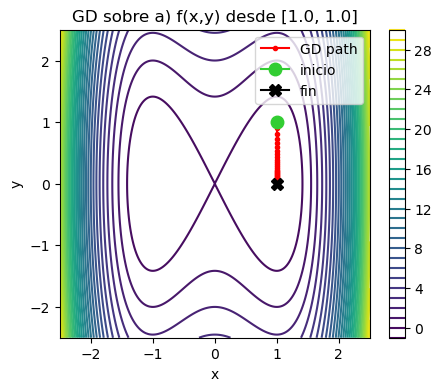

Caso b) f(x,y), x0=[-1.0, -1.0], gamma=0.1, iters=100


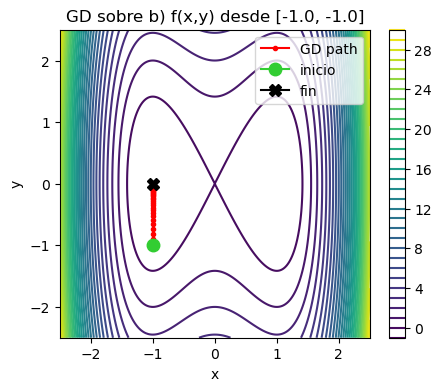

Caso c) f(x,y), x0=[0.0, 0.1], gamma=0.1, iters=100


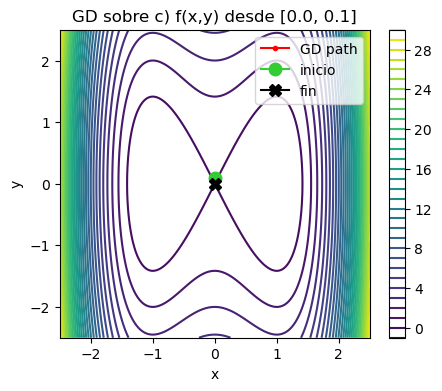

Caso d) g(x,y), x0=[1.0, 0.0], gamma=0.1, iters=100


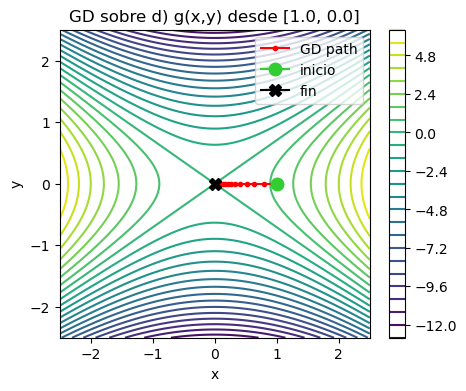

Caso e) g(x,y), x0=[0.0, 1.0], gamma=0.1, iters=100


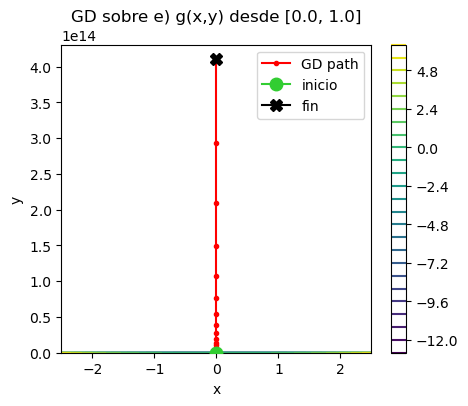

Caso f) h(x,y), x0=[0.0, 0.0], gamma=0.1, iters=69


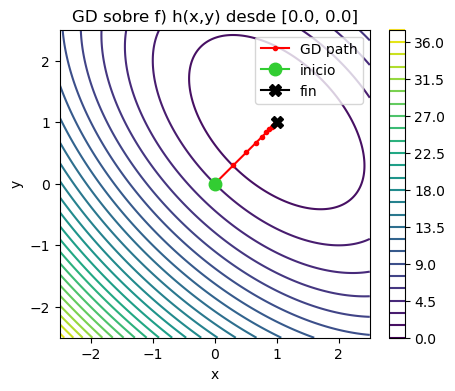

In [12]:
# helpers para evaluar funciones en NumPy
f_np_sym = sp.lambdify((x, y), f, "numpy")
g_np_sym = sp.lambdify((x, y), g, "numpy")
h_np_sym = sp.lambdify((x, y), h, "numpy")

# Gradientes simbólicos ya calculados: grads['f'], grads['g'], grads['h']
# Casos requeridos
casos = [
    ("a) f(x,y)", grads['f'], f_np_sym, [1.0, 1.0], 0.1, 100),
    ("b) f(x,y)", grads['f'], f_np_sym, [-1.0, -1.0], 0.1, 100),
    ("c) f(x,y)", grads['f'], f_np_sym, [0.0, 0.1], 0.1, 100),
    ("d) g(x,y)", grads['g'], g_np_sym, [1.0, 0.0], 0.1, 100),
    ("e) g(x,y)", grads['g'], g_np_sym, [0.0, 1.0], 0.1, 100),
    ("f) h(x,y)", grads['h'], h_np_sym, [0.0, 0.0], 0.1, 100),
]

for nombre, grad_expr, fun_np, x0, gamma, nmax in casos:
    path = descenso_grad(grad_expr, x0=x0, gamma=gamma, nmax=nmax)
    print(f"Caso {nombre}, x0={x0}, gamma={gamma}, iters={len(path)-1}")
    plot_contour_with_path(fun_np, path, title=f"GD sobre {nombre} desde {x0}")

En las anteriores ejecuciones del algoritmo de descenso de gradiente, vemos que todos convergen, pero en el caso e), vemos que la función g(x,y) diverge en el eje y, esto pasa porque se toma el punto (0,1) para empezar, en un punto silla (ya clasificado como tal), y dado que el componente x del gradiente es cero, al ser el punto (0,1), x se queda en 0, así que el gradiente sólo apunta en la trayectoria Y para moverse, lo que provoca que, al moverse paso por paso, la función baje sin una cota, porque la función es una silla y no tiene un mínimo, por eso es que "se va a infinito" o su valor diverge.

En cuanto al caso f), como se puede ver en la gráfica 3D, tiene forma de tazón, y vemos que está centrado en (1,1), ya que hemos comprobado ese punto crítico anteriormente con los criterios, por lo que el gradiente apunta siempre a ese centro, y dado que empezamos en (0,0), el algoritmo no debería tener problema en moerse tan poca distnacia, llegando sin problemas.

En el caso d), el punto empieza en (1,0), caso contrario al de e), por lo que el gradiente no nos apuntará a movernos en el eje y, sólo en el eje x, ya que el punto está en x=1 ahí, por lo que al moverse el gradiente en el eje x, que es una dirección segura, ya que en el en eje x en los extremos la función sólo aumenta su valor, mientras que en el caso e), en el eje y la función decrece su valor. Por eso, podemos converger seguramente. No nos "caemos de la silla".

En el caso c), el punto inicial es el (0,1) en la función F, que tiene 2 puntos críticos y un punto silla en (0,0). Como vemos, el algoritmo de gradiente nos llevó el punto silla simplemente porque empezamos en (0,1), o sea que estamos en una dirección estable para x, si x hubiera sido diferente, hubieramos terminado en algún punto mínimo, pero aquí se ha motivo sólo en el eje y porque para allá apuntaba el gradiente, y terminamos en el punto silla.

Para el caso a), ocurre algo similar, pero se llega a los puntos mínimos, y esto se debe a que ponemos los dos puntos iniciando en la coordenada del eje x exacta en donde está el mínimo para cada caso, por lo que en cada caso el algoritmo sólo tiene que seguir al gradiente negativo, que apunta ya sea positiva o negativamente en el eje y, según corresponda en cada caso, por eso terminamos en los puntos mínimos.

Además, para todos estos casos excepto en el que diverge por otras causas, el valor de lambda=0.1 ha sido lo bastante pequeño como para que se llegue al valor esperado. Mientras más pequeño el valor, más preciso, pero más steps (iteraciones) se podrían requerir, lo que incrementa el costo computacional de las operaciones.

El algoritmo de gradiente requiere que seamos conscientes de dónde debemos poner el punto inicial, pero también de los pasos (lambda), si son demasiado altos, se podría terminar en un bucle sin fin porque el algoritmo no puede llegar a su destino.



Aquí, juntamos algunas de las curvas de nivel de cada función como agregado extra, usando el método plt.contour, como lo requiere el enunciado, pero el gráfico de la función g está distorsionado puesto que en un caso, ésta diverge, se podría hacer dos gráficos para esta parte, pero ya está definido arriba y no lo veo necesario.

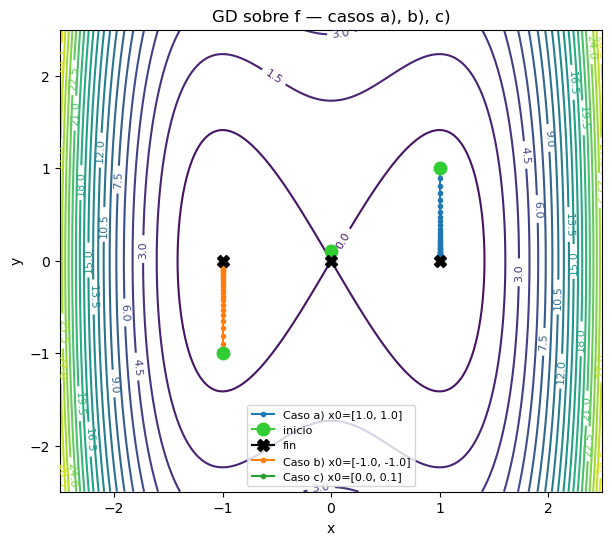

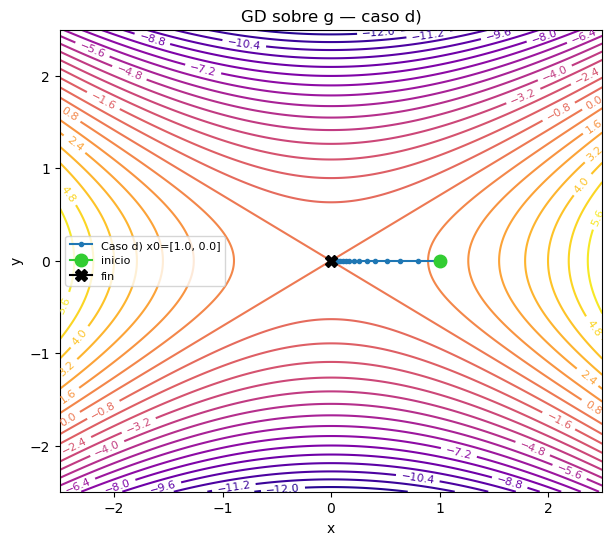

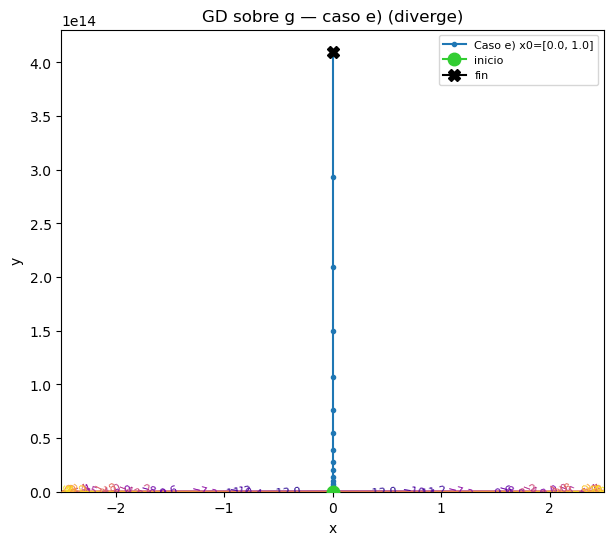

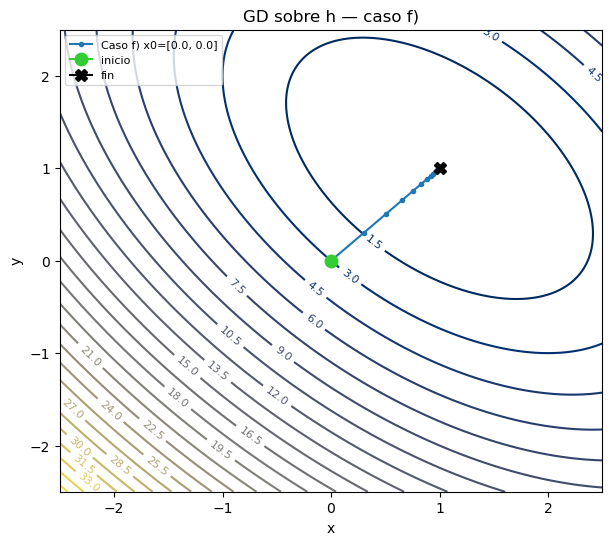

In [13]:
# Compilar y graficar TODAS las trayectorias en figuras separadas por función, etiquetadas a) … f)
casos = [
    ("a", "f", grads['f'], f_np_sym, [1.0, 1.0], 0.1, 100),
    ("b", "f", grads['f'], f_np_sym, [-1.0, -1.0], 0.1, 100),
    ("c", "f", grads['f'], f_np_sym, [0.0, 0.1], 0.1, 100),
    ("d", "g", grads['g'], g_np_sym, [1.0, 0.0], 0.1, 100),
    ("e", "g", grads['g'], g_np_sym, [0.0, 1.0], 0.1, 100),
    ("f", "h", grads['h'], h_np_sym, [0.0, 0.0], 0.1, 100),
]

# Mallas para contornos
xs = np.linspace(-2.5, 2.5, 300)
ys = np.linspace(-2.5, 2.5, 300)
X, Y = np.meshgrid(xs, ys)
Zf = f_np_sym(X, Y)
Zg = g_np_sym(X, Y)
Zh = h_np_sym(X, Y)

# Figura para f
plt.figure(figsize=(7, 6))
cs = plt.contour(X, Y, Zf, levels=25, cmap='viridis')
plt.clabel(cs, inline=True, fontsize=8)
plt.title('GD sobre f — casos a), b), c)')
first_marker = True
for letra, nombre, grad_expr, fun_np, x0, gamma, nmax in casos:
    if nombre == 'f':
        path = descenso_grad(grad_expr, x0=x0, gamma=gamma, nmax=nmax)
        plt.plot(path[:,0], path[:,1], '.-', label=f'Caso {letra}) x0={x0}')
        # marcar inicio y fin una sola vez en la leyenda
        if first_marker:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, label='inicio', zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, label='fin', zorder=6)
            first_marker = False
        else:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, zorder=6)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best', fontsize=8)
plt.show()

# Figura para g — caso d)
plt.figure(figsize=(7, 6))
cs = plt.contour(X, Y, Zg, levels=25, cmap='plasma')
plt.clabel(cs, inline=True, fontsize=8)
plt.title('GD sobre g — caso d)')
first_marker = True
for letra, nombre, grad_expr, fun_np, x0, gamma, nmax in casos:
    if nombre == 'g' and letra == 'd':
        path = descenso_grad(grad_expr, x0=x0, gamma=gamma, nmax=nmax)
        plt.plot(path[:,0], path[:,1], '.-', label=f'Caso {letra}) x0={x0}')
        if first_marker:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, label='inicio', zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, label='fin', zorder=6)
            first_marker = False
        else:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, zorder=6)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best', fontsize=8)
plt.show()

# Figura para g — caso e) (diverge; se muestra tramo inicial)
plt.figure(figsize=(7, 6))
cs = plt.contour(X, Y, Zg, levels=25, cmap='plasma')
plt.clabel(cs, inline=True, fontsize=8)
plt.title('GD sobre g — caso e) (diverge)')
first_marker = True


for letra, nombre, grad_expr, fun_np, x0, gamma, nmax in casos:
    if nombre == 'g' and letra == 'e':
        path = descenso_grad(grad_expr, x0=x0, gamma=gamma, nmax=nmax)
        plt.plot(path[:,0], path[:,1], '.-', label=f'Caso {letra}) x0={x0}')
        if first_marker:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, label='inicio', zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, label='fin', zorder=6)
            first_marker = False
        else:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, zorder=6)


plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best', fontsize=8)
plt.show()

# Figura para h
plt.figure(figsize=(7, 6))
cs = plt.contour(X, Y, Zh, levels=25, cmap='cividis')
plt.clabel(cs, inline=True, fontsize=8)
plt.title('GD sobre h — caso f)')
first_marker = True
for letra, nombre, grad_expr, fun_np, x0, gamma, nmax in casos:
    if nombre == 'h':
        path = descenso_grad(grad_expr, x0=x0, gamma=gamma, nmax=nmax)
        plt.plot(path[:,0], path[:,1], '.-', label=f'Caso {letra}) x0={x0}')
        if first_marker:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, label='inicio', zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, label='fin', zorder=6)
            first_marker = False
        else:
            plt.plot(path[0,0], path[0,1], marker='o', color='limegreen', markersize=9, zorder=5)
            plt.plot(path[-1,0], path[-1,1], marker='X', color='black', markersize=9, zorder=6)
plt.xlabel('x'); plt.ylabel('y')
plt.legend(loc='best', fontsize=8)
plt.show()